In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt


# Non-negative Matrix Factorization (NMF)
- similarly to PCA
    - can be used for dimensionality reduction
    - used to extract useful features
    - we are trying to write each data point as a weighted sum of some components

- unlike PCA, we want components and the coefficients to be non-negative
- we want both the components and the coefficients to be greater than or equal to zero.
- requires each feature to be non-negative, as a non-negative sum of non-negative components cannot become negative
---
- decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as an audio track of multiple people speaking, or music with many instruments.
    - in these situations, NMF can identify the original components that make up the combined data
- NMG leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects
-The eigenfaces in the previous example (dimensionality_reduction_feature_extraction.ipynb) contain both positive and negative parts, and as we mentioned in the description of PCA, the sign is actually arbitrary
- before we apply NMF to the face dataset, let's briefly revisit the synthetic data

## Applying NMF to synthetic data
- in contract to PCA, the data is required to be positive for NMF to be able to operate


/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maxi

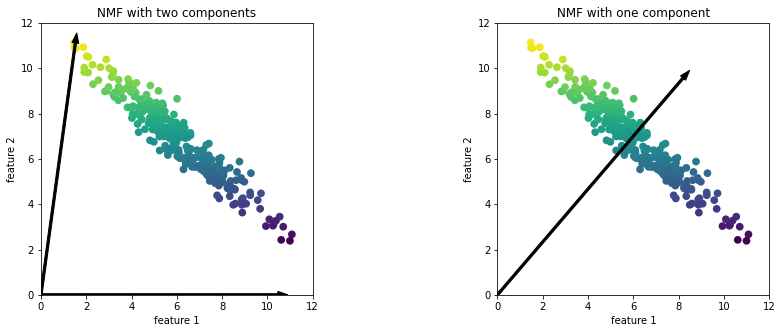

In [3]:
mglearn.plots.plot_nmf_illustration()

- with the two components all points in the data can be written as a positive combination of the two components
- if there are enough componentns to perfectly reconstruct the data (as many components as there are features), the algorithm will choose directions that point toward the extremes of the data
- single components, NMF creates a component that ponts toward the mean to best explain the data
- in contrast with PCA, reducing the number of components not only removes some directions, but creates an entirely different set of components
- components in NMF are not ordered, all components play an equal part
- NMF uses random initialization, whic hmight lead to different results depending on the random seed. This may cause drastic changes in complex situations


## Applying NMF to face images


In [4]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255

from  sklearn.neighbors import KNeighborsClassifier# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

In [5]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))


/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maxi

KeyboardInterrupt: 

the quality of back-transformed data is similar to PCA, but slightly worse. This is due to PCA finding the optimum directions in terms of reconstructin. NMF is not used for its ability to reconstruct or encode data, but rather finding interesting patterns within the data.

/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


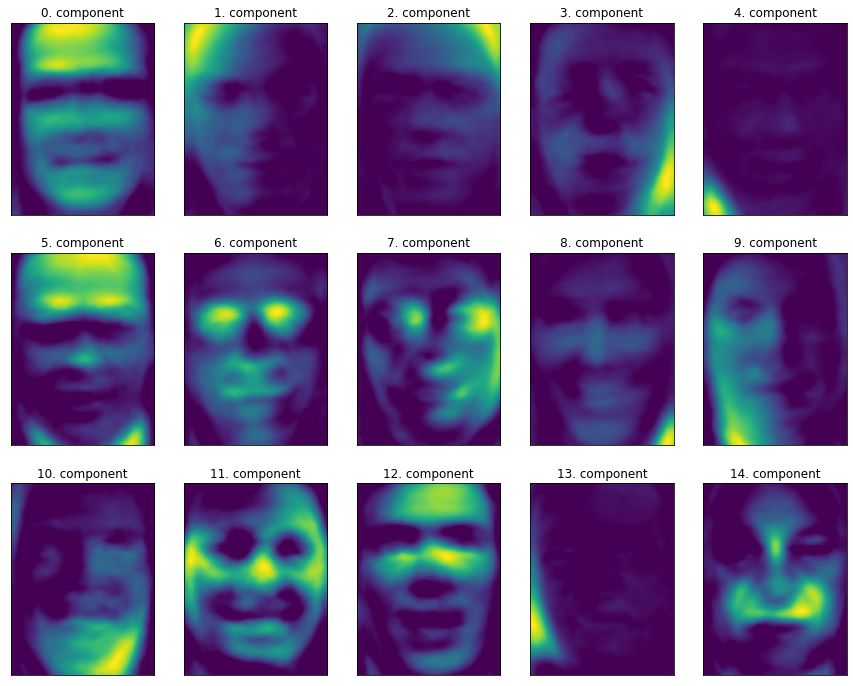

In [6]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15,12),
    subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

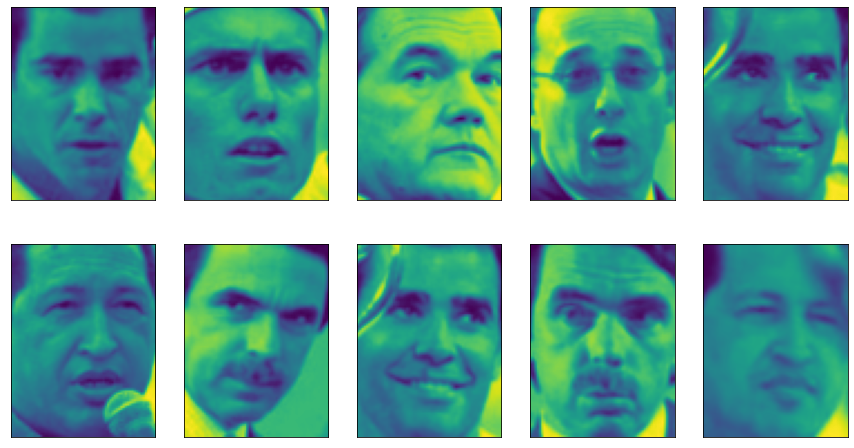

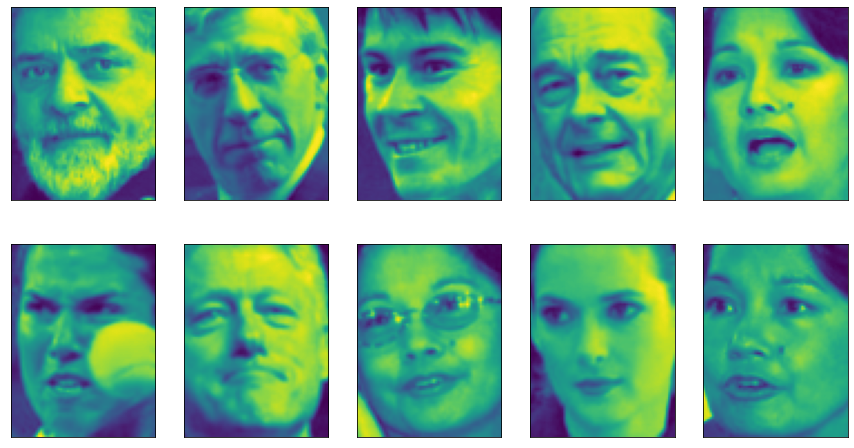

In [7]:
compn = 3
#sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8),
    subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
#sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fix, axes = plt.subplots(2,5, figsize=(15,8),
    subplot_kw={'xticks': (), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- faces that have a high coefficient for component 3 are faces looking to the right, while faces with a high coefficient for component 7 are looking to the left.
- Extracting patterns like these work best for data with additive structure, including audio, gene expression, and text data


#### Example with synthetic data
- signal that is a combination of three different sources

Text(0, 0.5, 'Signal')

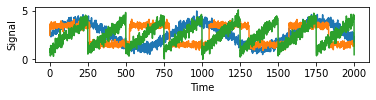

In [8]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [9]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))


Shape of measurements: (2000, 100)


In [10]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))


/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Recovered signal shape: (2000, 3)


/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [11]:
# for comparison, we also apply PCA:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

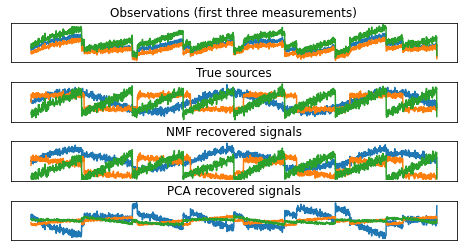

In [13]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
    'True sources',
    'NMF recovered signals',
    'PCA recovered signals'
]

fig, axes = plt.subplots(4, figsize=(8,4),
    gridspec_kw={'hspace': .5},
    subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')


For further exploration: https://scikit-learn.org/stable/modules/decomposition.html